# Feature Scaling Normalization D25

## import librarys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv('wine.csv',usecols=[0,1,13])

In [20]:
df.head(5)

,Alcohol,Malic_Acid,Customer_Segment
0,14.23,1.71,1
1,13.20,1.78,1
2,13.16,2.36,1
3,14.37,1.95,1
4,13.24,2.59,1


## Train Test Spilt

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Customer_Segment',axis=1),df['Customer_Segment'], test_size=0.3,random_state=0)

In [34]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

# Now use MinMaxScaler

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler=MinMaxScaler()

In [37]:
scaler.fit(x_train)

MinMaxScaler()

In [40]:
x_train_scaled=scaler.transform(x_train)

In [41]:
x_test_scaled=scaler.transform(x_test)

# now convert into to DataFrame

In [43]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [46]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_train.columns)

In [48]:
x_train_scaled.head()

,Alcohol,Malic_Acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [50]:
x_test_scaled.head()

,Alcohol,Malic_Acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513


# now check before and after values

In [58]:
x_train.describe()

,Alcohol,Malic_Acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [57]:
x_train_scaled.describe()

,Alcohol,Malic_Acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


# Now use Round() function

In [55]:
np.round(x_train.describe(),1)

,Alcohol,Malic_Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [56]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic_Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


# Graph

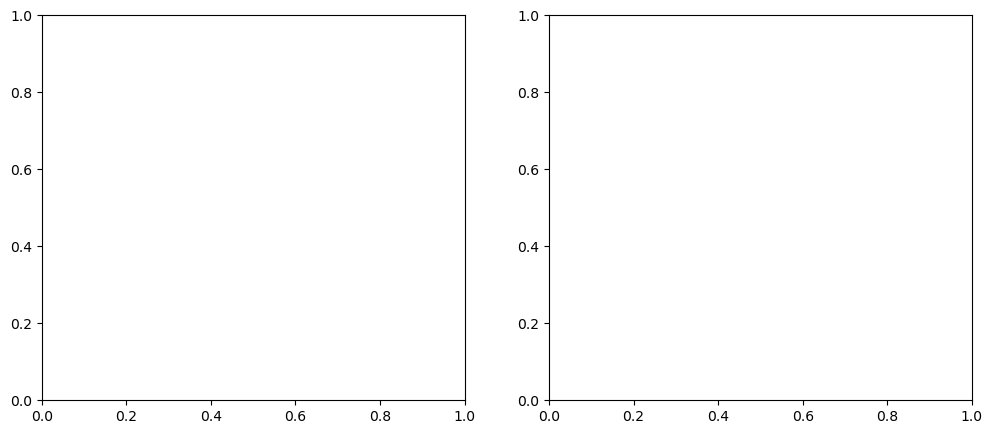

In [60]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# Scatter Graph

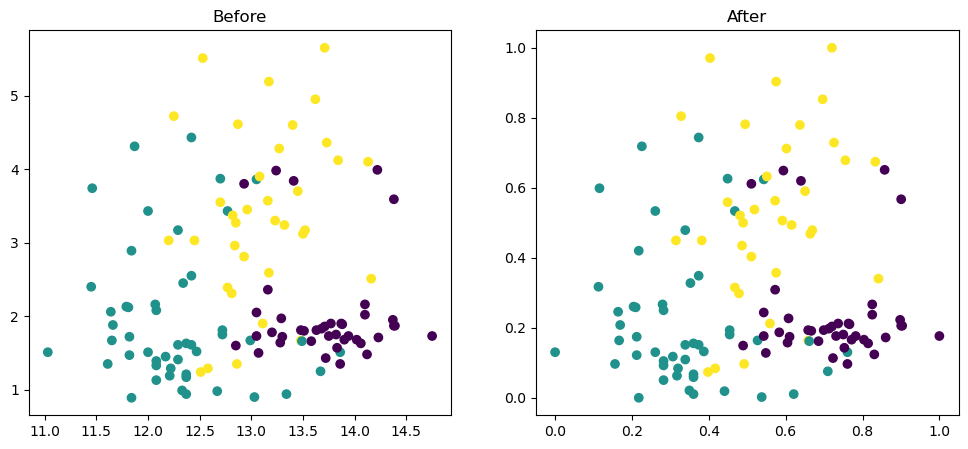

In [65]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before')
ax1.scatter(x_train['Alcohol'],x_train['Malic_Acid'],c=y_train)

ax2.set_title('After')
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic_Acid'],c=y_train)

# kdeplot

<Axes: title={'center': 'After'}, xlabel='Alcohol', ylabel='Density'>

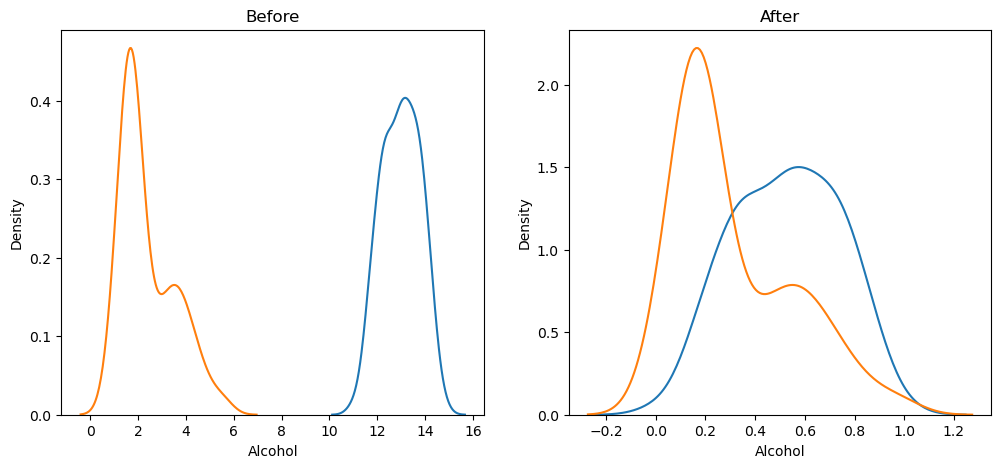

In [68]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic_Acid'],ax=ax1)

ax2.set_title('After')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic_Acid'],ax=ax2)